# I Exploratory Data Analysis

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
file = pd.read_csv('trainTitanic.csv',index_col=0)

In [3]:
type(file)

pandas.core.frame.DataFrame

In [4]:
file.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
file.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [7]:
file.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


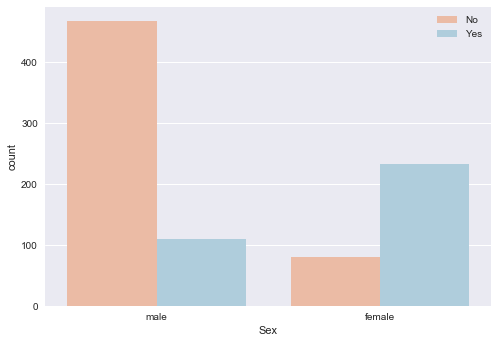

In [8]:
plt.clf()
plt.figure()
sns.countplot(x='Sex', hue='Survived', data=file, palette='RdBu')
plt.legend(['No', 'Yes'])
plt.show()

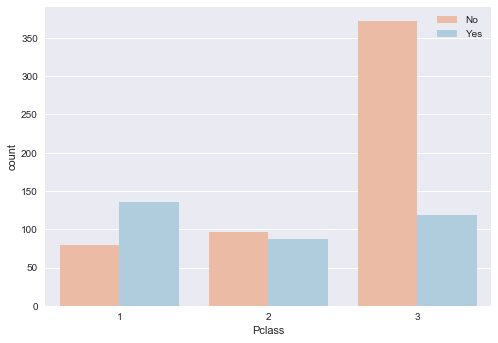

In [9]:
plt.figure()
sns.countplot(x='Pclass', hue='Survived', data=file, palette='RdBu')
plt.legend(['No', 'Yes'])
plt.show()

In [10]:
sex =[]
for i in file['Sex']:
    if i == 'male':
        sex.append(0)
    else :
        sex.append(1)
file['Sex'] = sex

In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [12]:
file.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

### The fields that are missing values are:
Age,
Cabin,
Embarked

# II Feature Engineering

In [64]:
def status(feature):

    print ('Processing',feature,': ok')

### We combine the training and test dataset to avoid having to do the same processing for the test set

In [84]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('trainTitanic.csv')
    
    # reading test data
    test = pd.read_csv('testTitanic.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

In [66]:
    # reading train data
    train = pd.read_csv('trainTitanic.csv')
    
    # reading test data
    test = pd.read_csv('testTitanic.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)

### John - Why is the index processing needed and what does it do?

In [ ]:


combined.index

In [76]:
combined.reset_index(inplace=True)
combined.index

RangeIndex(start=0, stop=1309, step=1)

In [77]:
combined.drop('index',inplace=True,axis=1)
combined.index

RangeIndex(start=0, stop=1309, step=1)

In [85]:
combined = get_combined_data()

In [86]:
combined.shape

(1309, 11)

In [88]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extracting the passenger titles

When looking at the passenger names one could wonder how to process them to extract an easily interpretable information.

If you look closely at these first examples: 

- Braund, <b> Mr.</b> Owen Harris	
- Heikkinen, <b>Miss.</b> Laina
- Oliva y Ocana, <b>Dona.</b> Fermina
- Peter, <b>Master.</b> Michael J

You will notice that each name has a title in it ! This can be a simple Miss. or Mrs. but it can be sometimes something more sophisticated like Master, Sir or Dona. In that case, we might introduce additional information about the social status by simply parsing the name and extracting the title.

Let's see how we'll do that in the function below.

In [ ]:
def get_titles():

    global combined
    
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)

# III Modeling

### Spliting Training vs Test datasets

In [89]:
# Notas para dividir data set entre Features/Target y Train/Test
# Create feature and target arrays
#X = digits.data
#y = digits.target

# Split into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

### Seaparating Features from Target

In [14]:
#target = file['Survived']
#features = file.drop('Survived', axis =1)
#print(target.head())
#print(features.head())
#print(file.head())

In [15]:
file.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [59]:
cols = ['Sex']

In [60]:
X = file[cols]
y = file[['Survived']]
# You get a DF with double brackets but a series with single

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators = 50)
model.fit(X_train,y_train['Survived'].values)
predictions = model.predict(X_test)
sum(predictions), sum(y_test['Survived'].values)

(61, 69)

In [47]:
y_train['Survived'].sum()

273

In [48]:
y_train.shape

(712, 1)

In [49]:
y_test['Survived'].sum()

69

In [50]:
y_test.shape

(179, 1)

In [58]:
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

print(accuracy_score(y_test,predictions))

[[89 21]
 [20 49]]
             precision    recall  f1-score   support

          0       0.82      0.81      0.81       110
          1       0.70      0.71      0.71        69

avg / total       0.77      0.77      0.77       179

0.77094972067


In [63]:
train

NameError: name 'train' is not defined